# I2A2 - Bone Age Regression




This a competition to create a model to predict the Bone Age of children from a Hand X-Ray.

https://www.kaggle.com/c/i2a2-bone-age-regression/overview

## Analyse data


This is the first notebook for this solution. 
Here we'll only analyse data and prepare datasets to apply on neural networks models in the next notebook.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


On competition page is possible to download all datasets and images.

In this case I put in this path on my Google Drive. If you wish run this code, please copy datset to your Drive and chage the paths with your paths reference.

In [80]:
!ls -all -h /content/gdrive/My\ Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression

total 223K
-rw------- 1 root root 6.1K Jun 26 02:42 .DS_Store
drwx------ 2 root root 4.0K Jun 26 02:55 images
-rw------- 1 root root  15K Jun 16 22:59 sample_submission.csv
-rw------- 1 root root  11K Jun 16 22:59 test.csv
-rw------- 1 root root 187K Jun 16 22:59 train.csv


In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpim

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [8]:
df_train = pd.read_csv('/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/train.csv')
df_train.head()

,fileName,patientSex,boneage
0,1377.png,F,180
1,1378.png,F,12
2,1379.png,F,94
3,1380.png,M,120
4,1381.png,F,82


Girls and boys like women and men have so much different ossea structure, for that, for this solution, we'll train two models one to apply to girls Hand X-Ray and another to boys.

In [9]:
df_train_femele = df_train.query('patientSex == "F"')
df_train_femele.describe()

,boneage
count,5778.000000
mean,117.880235
std,37.908112
min,4.000000
25%,94.000000
50%,120.000000
75%,144.000000
max,216.000000


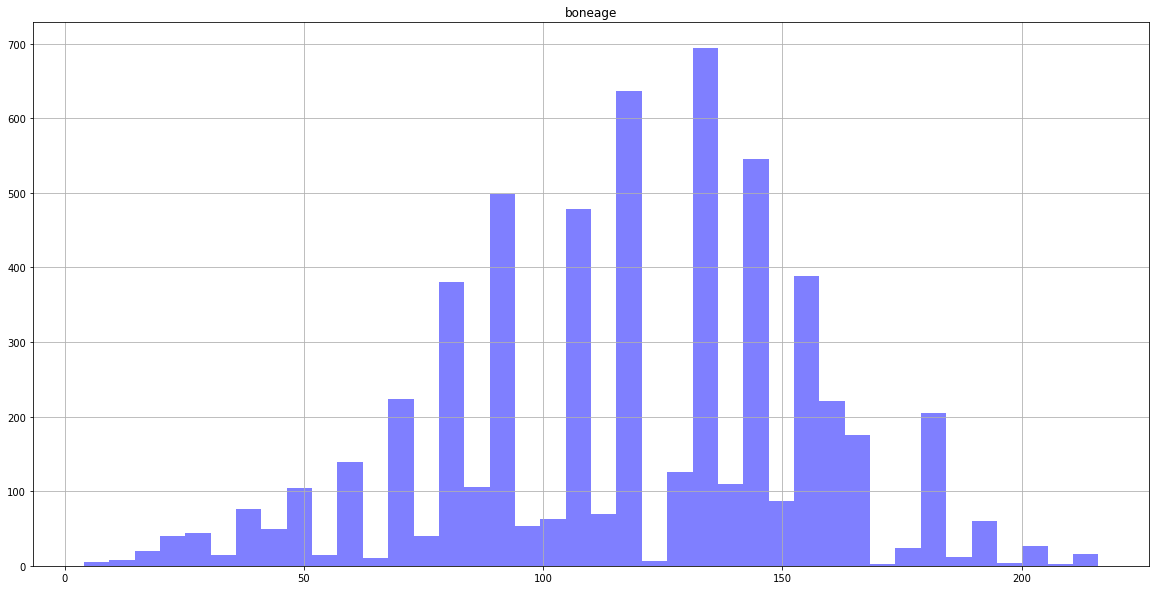

In [10]:
df_train_femele.hist(column = 'boneage', bins = 40, color = 'blue', alpha = 0.5, figsize=(20, 10))
plt.show()

In [11]:
first_female_group = df_train_femele.query('boneage < 50')
print('Less than 50 months: ', len(first_female_group))

second_female_group = df_train_femele.query('boneage >= 50 and boneage < 100')
print('Between 50 and 100 months: ', len(second_female_group))

third_female_group = df_train_femele.query('boneage >= 100 and boneage < 150')
print('Between 100 and 150 months: ', len(third_female_group))

fourth_female_group = df_train_femele.query('boneage >= 150 and boneage < 200')
print('Between 150 and 200 months: ', len(fourth_female_group))

fifth_female_group = df_train_femele.query('boneage >= 200')
print('More than 200 months: ', len(fifth_female_group))

Less than 50 months:  265
Between 50 and 100 months:  1561
Between 100 and 150 months:  2729
Between 150 and 200 months:  1178
More than 200 months:  45


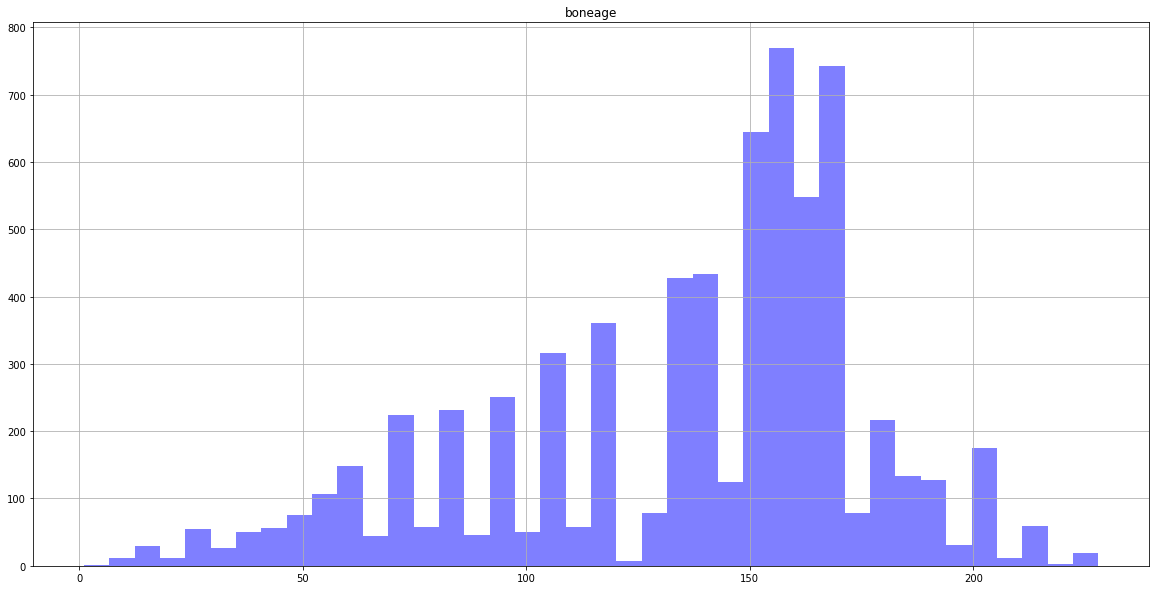

In [14]:
df_train_male = df_train.query('patientSex == "M"')
df_train_male.hist(column = 'boneage', bins = 40, color = 'blue', alpha = 0.5, figsize=(20, 10))
plt.show()

In [15]:
first_male_group = df_train_male.query('boneage < 50')
print('Less than 50 months: ', len(first_male_group))

second_male_group = df_train_male.query('boneage >= 50 and boneage < 100')
print('Between 50 and 100 months: ', len(second_male_group))

third_male_group = df_train_male.query('boneage >= 100 and boneage < 150')
print('Between 100 and 150 months: ', len(third_male_group))

fourth_male_group = df_train_male.query('boneage >= 150 and boneage < 200')
print('Between 150 and 200 months: ', len(fourth_male_group))

fifth_male_group = df_train_male.query('boneage >= 200')
print('More than 200 months: ', len(fifth_male_group))

Less than 50 months:  304
Between 50 and 100 months:  1120
Between 100 and 150 months:  1855
Between 150 and 200 months:  3288
More than 200 months:  266


In [80]:
df_test = pd.read_csv('/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/test.csv')
df_test.head()

,fileName,patientSex
0,8B2563DD-1B74-4F22-A2DC-46CCF7B58920.png,F
1,34E48F6E-144E-4E36-9996-71B797A5E348.png,F
2,601B717A-3548-42E2-BBB7-20C9DB598332.png,F
3,933BBD2E-2E42-4E46-8CE6-EE89688D9C1E.png,F
4,992B3882-02C9-493D-BC4A-C4015E1297A3.png,F


In [81]:
df_sample = pd.read_csv('/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/sample_submission.csv')
df_sample.head()

,fileName,patientSex,boneage
0,8B2563DD-1B74-4F22-A2DC-46CCF7B58920.png,F,111.606890
1,34E48F6E-144E-4E36-9996-71B797A5E348.png,F,170.459629
2,601B717A-3548-42E2-BBB7-20C9DB598332.png,F,72.230273
3,933BBD2E-2E42-4E46-8CE6-EE89688D9C1E.png,F,182.893253
4,992B3882-02C9-493D-BC4A-C4015E1297A3.png,F,207.787241


In [82]:
df_sample.describe()

,boneage
count,249.000000
mean,109.100850
std,62.380766
min,1.001444
25%,59.262119
50%,109.292496
75%,161.468653
max,224.963781


# Prepare images 

First, let's clean the dataset images to extract realy Hand X-Ray images, without for example black boards around and things possible to disturb the neural network learning.

In [20]:
import cv2
import numpy as np
import os

In [84]:
def normalize_images(path):
    df = pd.read_csv(f'/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/{path}.csv')

    for filename in df['fileName']:
       _clean_image(path, filename)

In [85]:
def _clean_image(path, filename):
    image = cv2.imread(f"/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/images/{filename}")
    contours = _get_contours(image)
    
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (0, 255, 0), 2)
    (x, y, _) = np.where(mask == 255)
 
    if len(x) > 0 and len(y) > 0:
        (topx, topy) = (np.min(x), np.min(y))
        (bottomx, bottomy) = (np.max(x), np.max(y))

        image = image[topx:bottomx+1, topy:bottomy+1]
        print('contours', len(contours))

        height, width, _ = image.shape
        print('width', width)

        if width > 800:
            width_cutoff = width // 2
            image = image[:, width_cutoff:]

    if not os.path.exists(f'/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-{path}'):
      os.makedirs(f'/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-{path}')

    cv2.imwrite(f"/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-{path}/{filename}", image)

In [86]:
def _get_contours(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image_edges = cv2.Canny(image_gray, 40, 180)

    contours, hierarchy = cv2.findContours(image_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    return contours

Clean images in train dataset.

In [ ]:
normalize_images('train')

Examples images before and after.

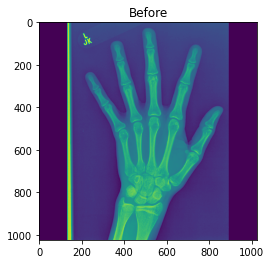

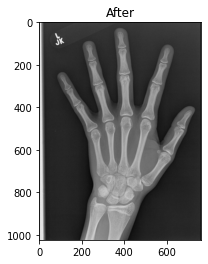

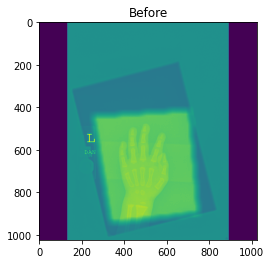

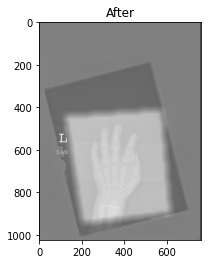

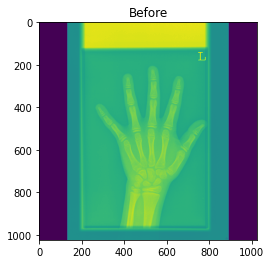

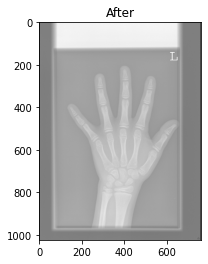

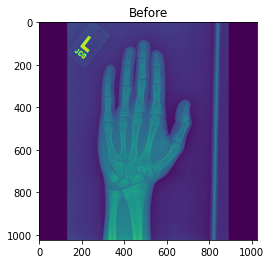

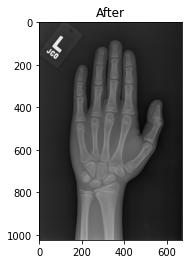

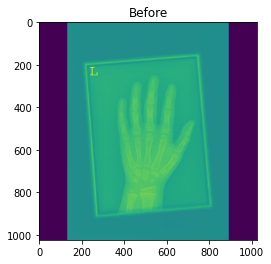

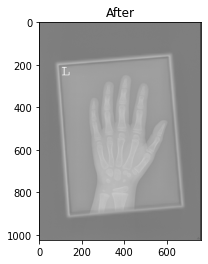

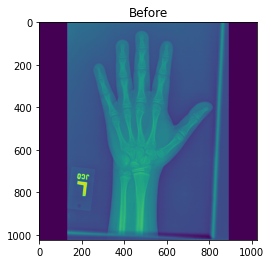

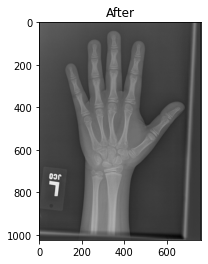

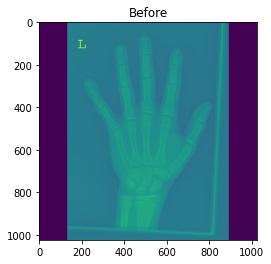

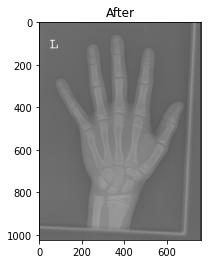

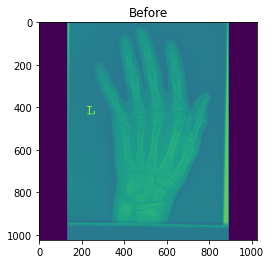

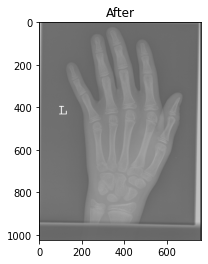

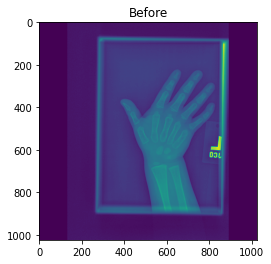

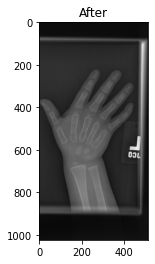

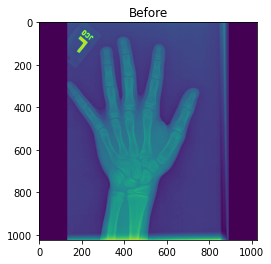

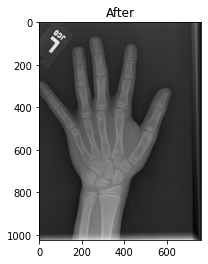

In [87]:
df = pd.read_csv(f'/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/train.csv')
df = df.head(10)

for filename in df['fileName']:
  plt.title('Before')
  before = mpimg.imread(f"/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/images/{filename}")
  imgplot = plt.imshow(before)
  plt.show()

  plt.title('After')
  after = mpimg.imread(f"/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-train/{filename}")
  imgplot = plt.imshow(after)
  plt.show()

## Prepare train dataset

Like we saw before, the numbers images to ages is very differnet. So the train dataset isn't balanced enought to apply a model. 

For that, we'll increase images in range with less images and use less images in age ranges where there much more than is necessary.

We'll use data augmentation to it.

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

A example to apply data augementation to generate new images from one.

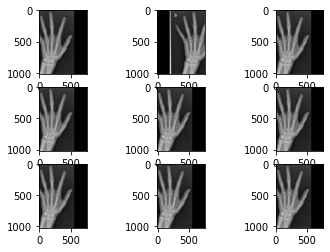

In [5]:
image = load_img("/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-train/1377.png")
data = img_to_array(image)

samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-200,200])

iterator = datagen.flow(samples, batch_size=1)
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = iterator.next()
	image_generated = batch[0].astype('uint8')
	pyplot.imshow(image_generated)
pyplot.show()

Now, We'll separe what data in train dataset will be incresed.

We have already seen that train datasest isn't balanced. Look again girl's data.

In [16]:
first_female_group = df_train_femele.query('boneage < 50')
print('Less than 50 months: ', len(first_female_group))

second_female_group = df_train_femele.query('boneage >= 50 and boneage < 100')
print('Between 50 and 100 months: ', len(second_female_group))

third_female_group = df_train_femele.query('boneage >= 100 and boneage < 150')
print('Between 100 and 150 months: ', len(third_female_group))

fourth_female_group = df_train_femele.query('boneage >= 150 and boneage < 200')
print('Between 150 and 200 months: ', len(fourth_female_group))

fifth_female_group = df_train_femele.query('boneage >= 200')
print('More than 200 months: ', len(fifth_female_group))

Less than 50 months:  265
Between 50 and 100 months:  1561
Between 100 and 150 months:  2729
Between 150 and 200 months:  1178
More than 200 months:  45


In `df_train_femele` we'll increase the first group, and choose ramdon 1000 elemnets each other group to create a balanced dataset with 4000 samples.

We won't use the last group because it has so small numbers of images.

In [45]:
def image_generated(filename, number_samples):
  image = load_img(f"/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-train/{filename}")
  data = img_to_array(image)

  samples = expand_dims(data, 0)
  datagen = ImageDataGenerator(width_shift_range=[-200,200])

  iterator = datagen.flow(samples, batch_size=1)
  new_images = []
  for i in range(number_samples):
    batch = iterator.next()
    image_generated = batch[0].astype('uint8')
    new_images.append(image_generated)
  
  return new_images

In [63]:
def update_dataset(dataset, patientSex, number_samples):
  mean_bornage = dataset['boneage'].mean()

  for filename in dataset['fileName']:
    new_images = image_generated(filename, number_samples)
    for idx, image in enumerate(new_images):
      cv2.imwrite(f"/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/clean-images-train/{idx}-{filename}", image)

      new_data = pd.DataFrame({"fileName":[f"{idx}-{filename}"], "patientSex":[patientSex], "boneage": [mean_bornage]})
      dataset = pd.concat([dataset, new_data], ignore_index=True)
  
  return dataset

In [66]:
first_increased_female_group = update_dataset(first_female_group, 'F', 4).head(1000)
first_increased_female_group

,fileName,patientSex,boneage
0,1378.png,F,12.000000
1,1398.png,F,4.000000
2,1399.png,F,36.000000
3,1402.png,F,24.000000
4,1407.png,F,30.000000
...,...,...,...
995,2-9789.png,F,31.890566
996,3-9789.png,F,31.890566
997,0-9799.png,F,31.890566
998,1-9799.png,F,31.890566


In [68]:
second_female_group = second_female_group.sample(n=1000, random_state=1)
third_female_group = third_female_group.sample(n=1000, random_state=1)
fourth_female_group = fourth_female_group.sample(n=1000, random_state=1)

train_female_final = pd.concat([first_increased_female_group, second_female_group, third_female_group, fourth_female_group], ignore_index=True)

In [69]:
train_female_final.to_csv('/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/F-train.csv')

In [81]:
!ls -all -h /content/gdrive/My\ Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression

total 323K
drwx------ 2 root root 4.0K Jul 18 15:37 clean-images-train
-rw------- 1 root root 6.1K Jun 26 02:42 .DS_Store
-rw------- 1 root root  96K Jul 18 15:19 F-train.csv
drwx------ 2 root root 4.0K Jun 26 02:55 images
-rw------- 1 root root  15K Jun 16 22:59 sample_submission.csv
-rw------- 1 root root  11K Jun 16 22:59 test.csv
-rw------- 1 root root 187K Jun 16 22:59 train.csv


So, we'll the same to boys's data.

In this case, we'll increase the first and the last groups doing a dataset with 5000 samples, 1000 samples of each group.

In [71]:
first_male_group = df_train_male.query('boneage < 50')
print('Less than 50 months: ', len(first_male_group))

second_male_group = df_train_male.query('boneage >= 50 and boneage < 100')
print('Between 50 and 100 months: ', len(second_male_group))

third_male_group = df_train_male.query('boneage >= 100 and boneage < 150')
print('Between 100 and 150 months: ', len(third_male_group))

fourth_male_group = df_train_male.query('boneage >= 150 and boneage < 200')
print('Between 150 and 200 months: ', len(fourth_male_group))

fifth_male_group = df_train_male.query('boneage >= 200')
print('More than 200 months: ', len(fifth_male_group))

Less than 50 months:  304
Between 50 and 100 months:  1120
Between 100 and 150 months:  1855
Between 150 and 200 months:  3288
More than 200 months:  266


In [72]:
first_increased_male_group = update_dataset(first_male_group, 'M', 4).head(1000)
first_increased_male_group

,fileName,patientSex,boneage
0,1385.png,M,36.000000
1,1422.png,M,32.000000
2,1428.png,M,33.000000
3,1440.png,M,42.000000
4,1445.png,M,21.000000
...,...,...,...
995,3-7449.png,M,33.940789
996,0-7470.png,M,33.940789
997,1-7470.png,M,33.940789
998,2-7470.png,M,33.940789


In [73]:
fifth_increased_male_group = update_dataset(fifth_male_group, 'M', 4).head(1000)
fifth_increased_male_group

,fileName,patientSex,boneage
0,1466.png,M,216.000000
1,1701.png,M,210.000000
2,1713.png,M,222.000000
3,1748.png,M,200.000000
4,1794.png,M,204.000000
...,...,...,...
995,1-10719.png,M,208.676692
996,2-10719.png,M,208.676692
997,3-10719.png,M,208.676692
998,0-10776.png,M,208.676692


In [74]:
second_male_group = second_male_group.sample(n=1000, random_state=1)
third_male_group = third_male_group.sample(n=1000, random_state=1)
fourth_male_group = fourth_male_group.sample(n=1000, random_state=1)

train_male_final = pd.concat([first_increased_male_group, second_male_group, third_male_group, fourth_male_group, fifth_increased_male_group], ignore_index=True)

In [75]:
train_male_final.to_csv('/content/gdrive/My Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression/M-train.csv')

In [79]:
!ls -all -h /content/gdrive/My\ Drive/career/I2A2/challenge-01/data/i2a2-bone-age-regression

total 449K
drwx------ 2 root root 4.0K Jul 18 15:37 clean-images-train
-rw------- 1 root root 6.1K Jun 26 02:42 .DS_Store
-rw------- 1 root root  96K Jul 18 15:19 F-train.csv
drwx------ 2 root root 4.0K Jun 26 02:55 images
-rw------- 1 root root 127K Jul 18 15:39 M-train.csv
-rw------- 1 root root  15K Jun 16 22:59 sample_submission.csv
-rw------- 1 root root  11K Jun 16 22:59 test.csv
-rw------- 1 root root 187K Jun 16 22:59 train.csv
